In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 200)
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.style.use('fivethirtyeight')
import matplotlib_inline
from pathlib import Path
# get higher quality plots
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.5
import seaborn as sns
import chardet

# Data Understanding

In [161]:
DATA_PATH = Path('../../data')

In [162]:
df = pd.read_parquet(DATA_PATH.joinpath('processed', 'game_logs_standings_v2.parquet'))

In [163]:
df.columns.tolist()

['Date',
 'Attendance',
 'Gm#',
 'R',
 'RA',
 'Rank',
 'GB',
 'Streak_count',
 'W',
 'L',
 'VistingTeamScore',
 'HomeTeamScore',
 'NumberofOuts',
 'LengthofGame',
 'cLI',
 'DayNight',
 'DayofWeek',
 'BallParkID',
 'VisitingTeamOffense_AtBats',
 'VisitingTeamOffense_Hits',
 'VisitingTeamOffense_Doubles',
 'VisitingTeamOffense_Triples',
 'VisitingTeamOffense_Homeruns',
 'VisitingTeamOffense_RBIs',
 'VisitingTeamOffense_SacrificeHits',
 'VisitingTeamOffense_SacrificeFlies',
 'VisitingTeamOffense_HitbyPitch',
 'VisitingTeamOffense_Walks',
 'VisitingTeamOffense_IntentionalWalks',
 'VisitingTeamOffense_Strickouts',
 'VisitingTeamOffense_StolenBases',
 'VisitingTeamOffense_CaughtStealing',
 'VisitingTeamOffense_GroundedintoDoublePlay',
 'VisitingTeamOffense_AwardedFirstonCatcherInterference',
 'VisitingTeamOffense_LeftOnBase',
 'VisitingTeamPitchers_PitchersUsed',
 'VisitingTeamPitchers_IndividualEarnedRuns',
 'VisitingTeamPitchers_TeamEarnedRuns',
 'VisitingTeamPitchers_WildPitches',
 'Visit

In [164]:
df.shape

(17743, 99)

In [165]:
df.head()

,Date,Attendance,Gm#,R,RA,Rank,GB,Streak_count,W,L,VistingTeamScore,HomeTeamScore,NumberofOuts,LengthofGame,cLI,DayNight,DayofWeek,BallParkID,VisitingTeamOffense_AtBats,VisitingTeamOffense_Hits,VisitingTeamOffense_Doubles,VisitingTeamOffense_Triples,VisitingTeamOffense_Homeruns,VisitingTeamOffense_RBIs,VisitingTeamOffense_SacrificeHits,VisitingTeamOffense_SacrificeFlies,VisitingTeamOffense_HitbyPitch,VisitingTeamOffense_Walks,VisitingTeamOffense_IntentionalWalks,VisitingTeamOffense_Strickouts,VisitingTeamOffense_StolenBases,VisitingTeamOffense_CaughtStealing,VisitingTeamOffense_GroundedintoDoublePlay,VisitingTeamOffense_AwardedFirstonCatcherInterference,VisitingTeamOffense_LeftOnBase,VisitingTeamPitchers_PitchersUsed,VisitingTeamPitchers_IndividualEarnedRuns,VisitingTeamPitchers_TeamEarnedRuns,VisitingTeamPitchers_WildPitches,VisitingTeamPitchers_Balks,VisitingTeamDefense_PutOuts,VisitingTeamDefense_Assists,VisitingTeamDefense_Errors,VisitingTeamDefense_PassedBalls,VisitingTeamDefense_DoublePlays,VisitingTeamDefense_TriplePlays,HomeTeamOffense_AtBats,HomeTeamOffense_Hits,HomeTeamOffense_Doubles,HomeTeamOffense_Triples,HomeTeamOffense_Homeruns,HomeTeamOffense_RBIs,HomeTeamOffense_SacrificeHits,HomeTeamOffense_SacrificeFlies,HomeTeamOffense_HitbyPitch,HomeTeamOffense_Walks,HomeTeamOffense_IntentionalWalks,HomeTeamOffense_Strickouts,HomeTeamOffense_StolenBases,HomeTeamOffense_CaughtStealing,HomeTeamOffense_GroundedintoDoublePlay,HomeTeamOffense_AwardedFirstonCatcherInterference,HomeTeamOffense_LeftOnBase,HomeTeamPitchers_PitchersUsed,HomeTeamPitchers_IndividualEarnedRuns,HomeTeamPitchers_TeamEarnedRuns,HomeTeamPitchers_WildPitches,HomeTeamPitchers_Balks,HomeTeamDefense_PutOuts,HomeTeamDefense_Assists,HomeTeamDefense_Errors,HomeTeamDefense_PassedBalls,HomeTeamDefense_DoublePlays,HomeTeamDefense_TriplePlays,HomePlateUmp_ID,HomePlateUmp_Name,1BUmp_ID,1BUmp_Name,2BUmp_ID,2BUmp_Name,3BUmp_ID,3BUmp_Name,LFUmp_Name,RFUmp_Name,VisitingTeamManager_ID,VisitingTeamManager_Name,HomeTeamManager_ID,HomeTeamManager_Name,WinningPitcher_ID,WinningPitcher_Name,LosingPitcher_ID,LosingPitcher_Name,SavingPitcher_Name,GameWinningRBIBatter_ID,GameWinningRBIBatter_Name,VisitingTeam_StartingPitcher_ID,VisitingTeam_StartingPitcher_Name,HomeTeam_StartingPitcher_ID,HomeTeam_StartingPitcher_Name
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2000-04-17,13622.0,13,1,7,2,1.5,-1,7,6,1,7,51,183,1.08,1.0,1.0,32.0,32,8,4,0,0,1,0,1,0,2,0,1,1,0,1,0,7,5,7,7,0,1,24,11,1,0,1,0,33,10,4,0,2,6,0,0,2,3,0,5,0,0,1,0,7,2,1,1,0,0,27,12,0,1,1,0,buckc901,CB Bucknor,clara901,Al Clark,vanvm901,Mike Vanvleet,reedr901,Rick Reed,(none),(none),sciom001,Mike Scioscia,fregj101,Jim Fregosi,escok001,Kelvim Escobar,ortir002,Ramon Ortiz,(none),delgc001,Carlos Delgado,ortir002,Ramon Ortiz,escok001,Kelvim Escobar
1,2000-04-18,13825.0,14,16,10,2,0.5,1,8,6,16,10,54,231,1.09,1.0,5.0,32.0,44,19,5,1,2,15,0,1,3,7,0,9,4,0,2,0,12,5,10,10,1,0,27,8,0,0,1,0,43,17,1,0,4,9,0,0,0,2,0,6,0,0,1,0,8,5,15,15,2,0,27,9,1,0,2,0,clara901,Al Clark,vanvm901,Mike Vanvleet,reedr901,Rick Reed,buckc901,CB Bucknor,(none),(none),sciom001,Mike Scioscia,fregj101,Jim Fregosi,dickj001,Jason Dickson,castf001,Frank Castillo,(none),gil-b001,Benji Gil,dickj001,Jason Dickson,castf001,Frank Castillo
2,2000-04-19,13572.0,15,4,12,2,0.5,-1,8,7,4,12,51,165,1.13,1.0,6.0,32.0,36,8,1,0,1,4,0,0,1,2,0,10,1,0,0,0,8,3,12,12,0,0,24,12,0,0,2,0,39,17,4,0,3,12,0,0,0,7,0,1,0,0,2,0,10,1,4,4,0,0,27,10,1,0,0,0,vanvm901,Mike Vanvleet,reedr901,Rick Reed,buckc901,CB Bucknor,clara901,Al Clark,(none),(none),sciom001,Mike Scioscia,fregj101,Jim Fregosi,welld001,David Wells,hillk001,Ken Hill,(none),cruzj004,Jose Cruz,hillk001,Ken Hill,welld001,David Wells
3,2000-04-20,13985.0,16,11,12,2,1.0,-2,8,8,11,12,51,179,1.12,1.0,4.0,32.0,41,19,4,0,1,11,0,2,0,2,0,5,1,1,2,0,7,3,12,12,1,0,24,13,0,0,2,0,35,14,3,0,2,12,0,0,1,6,1,5,1,1,2,0,6,5,11,11,1,0,27,14,0,0,2,0,reedr901,Rick Reed,buckc901,CB Bucknor,clara901,A

In [166]:
df.dtypes.tolist()

[dtype('<M8[ns]'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype

# Data Preparation

In [167]:
# check for null/missing values
df.isna().sum(axis=0)

Date                                 0
Attendance                           0
Gm#                                  0
R                                    0
RA                                   0
                                    ..
GameWinningRBIBatter_Name            0
VisitingTeam_StartingPitcher_ID      0
VisitingTeam_StartingPitcher_Name    0
HomeTeam_StartingPitcher_ID          0
HomeTeam_StartingPitcher_Name        0
Length: 99, dtype: int64

In [168]:
df.isna().sum().sum()

9

In [169]:
df.dtypes.value_counts()

int64             67
object            26
float64            5
datetime64[ns]     1
dtype: int64

In [170]:
df.describe()

,Attendance,Gm#,R,RA,Rank,Streak_count,W,L,VistingTeamScore,HomeTeamScore,NumberofOuts,LengthofGame,cLI,DayNight,DayofWeek,BallParkID,VisitingTeamOffense_AtBats,VisitingTeamOffense_Hits,VisitingTeamOffense_Doubles,VisitingTeamOffense_Triples,VisitingTeamOffense_Homeruns,VisitingTeamOffense_RBIs,VisitingTeamOffense_SacrificeHits,VisitingTeamOffense_SacrificeFlies,VisitingTeamOffense_HitbyPitch,VisitingTeamOffense_Walks,VisitingTeamOffense_IntentionalWalks,VisitingTeamOffense_Strickouts,VisitingTeamOffense_StolenBases,VisitingTeamOffense_CaughtStealing,VisitingTeamOffense_GroundedintoDoublePlay,VisitingTeamOffense_AwardedFirstonCatcherInterference,VisitingTeamOffense_LeftOnBase,VisitingTeamPitchers_PitchersUsed,VisitingTeamPitchers_IndividualEarnedRuns,VisitingTeamPitchers_TeamEarnedRuns,VisitingTeamPitchers_WildPitches,VisitingTeamPitchers_Balks,VisitingTeamDefense_PutOuts,VisitingTeamDefense_Assists,VisitingTeamDefense_Errors,VisitingTeamDefense_PassedBalls,VisitingTeamDefense_DoublePlays,VisitingTeamDefense_TriplePlays,HomeTeamOffense_AtBats,HomeTeamOffense_Hits,HomeTeamOffense_Doubles,HomeTeamOffense_Triples,HomeTeamOffense_Homeruns,HomeTeamOffense_RBIs,HomeTeamOffense_SacrificeHits,HomeTeamOffense_SacrificeFlies,HomeTeamOffense_HitbyPitch,HomeTeamOffense_Walks,HomeTeamOffense_IntentionalWalks,HomeTeamOffense_Strickouts,HomeTeamOffense_StolenBases,HomeTeamOffense_CaughtStealing,HomeTeamOffense_GroundedintoDoublePlay,HomeTeamOffense_AwardedFirstonCatcherInterference,HomeTeamOffense_LeftOnBase,HomeTeamPitchers_PitchersUsed,HomeTeamPitchers_IndividualEarnedRuns,HomeTeamPitchers_TeamEarnedRuns,HomeTeamPitchers_WildPitches,HomeTeamPitchers_Balks,HomeTeamDefense_PutOuts,HomeTeamDefense_Assists,HomeTeamDefense_Errors,HomeTeamDefense_PassedBalls,HomeTeamDefense_DoublePlays,HomeTeamDefense_TriplePlays
count,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17740.000000,17740.000000,17740.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000,17743.000000
mean,27108.489827,81.332976,4.582934,4.758665,3.030491,-0.260384,40.249112,41.075861,4.582483,4.759173,53.470214,179.440230,0.799372,0.674577,3.023224,15.390417,35.069999,9.014823,1.845911,0.167221,1.108663,4.391140,0.249281,0.263428,0.356028,3.152849,0.211464,7.544666,0.538635,0.227639,0.791354,0.005636,7.031731,3.867046,4.412613,4.404892,0.332638,0.030040,25.976160,9.567942,0.602153,0.069492,0.887223,0.000564,33.506679,8.914727,1.816435,0.197712,1.130587,4.563546,0.250296,0.278758,0.359466,3.261399,0.229612,6.930395,0.523305,0.199234,0.753480,0.005861,6.938173,4.035282,4.246351,4.240546,0.321648,0.029984,27.494054,10.142366,0.581131,0.065998,0.928704,0.001184
std,10510.457537,46.526271,3.221239,3.184555,1.443220,2.647636,24.063441,24.567539,3.221180,3.184638,4.864550,27.291405,0.686056,0.468546,2.016008,9.313713,4.382878,3.583419,1.438059,0.420078,1.128896,3.135945,0.519512,0.525354,0.621360,2.051906,0.495305,2.938251,0.851612,0.475150,0.865931,0.075613,2.656139,1.342014,3.045222,3.039507,0.605408,0.176546,2.782408,3.178472,0.798086,0.278015,0.909541,0.023734,4.151354,3.417333,1.417103,0.452478,1.123639,3.102485,0.520758,0.534212,0.615131,2.065624,0.520386,2.908276,0.843193,0.444325,0.845783,0.078521,2.645977,1

# Feature Understanding

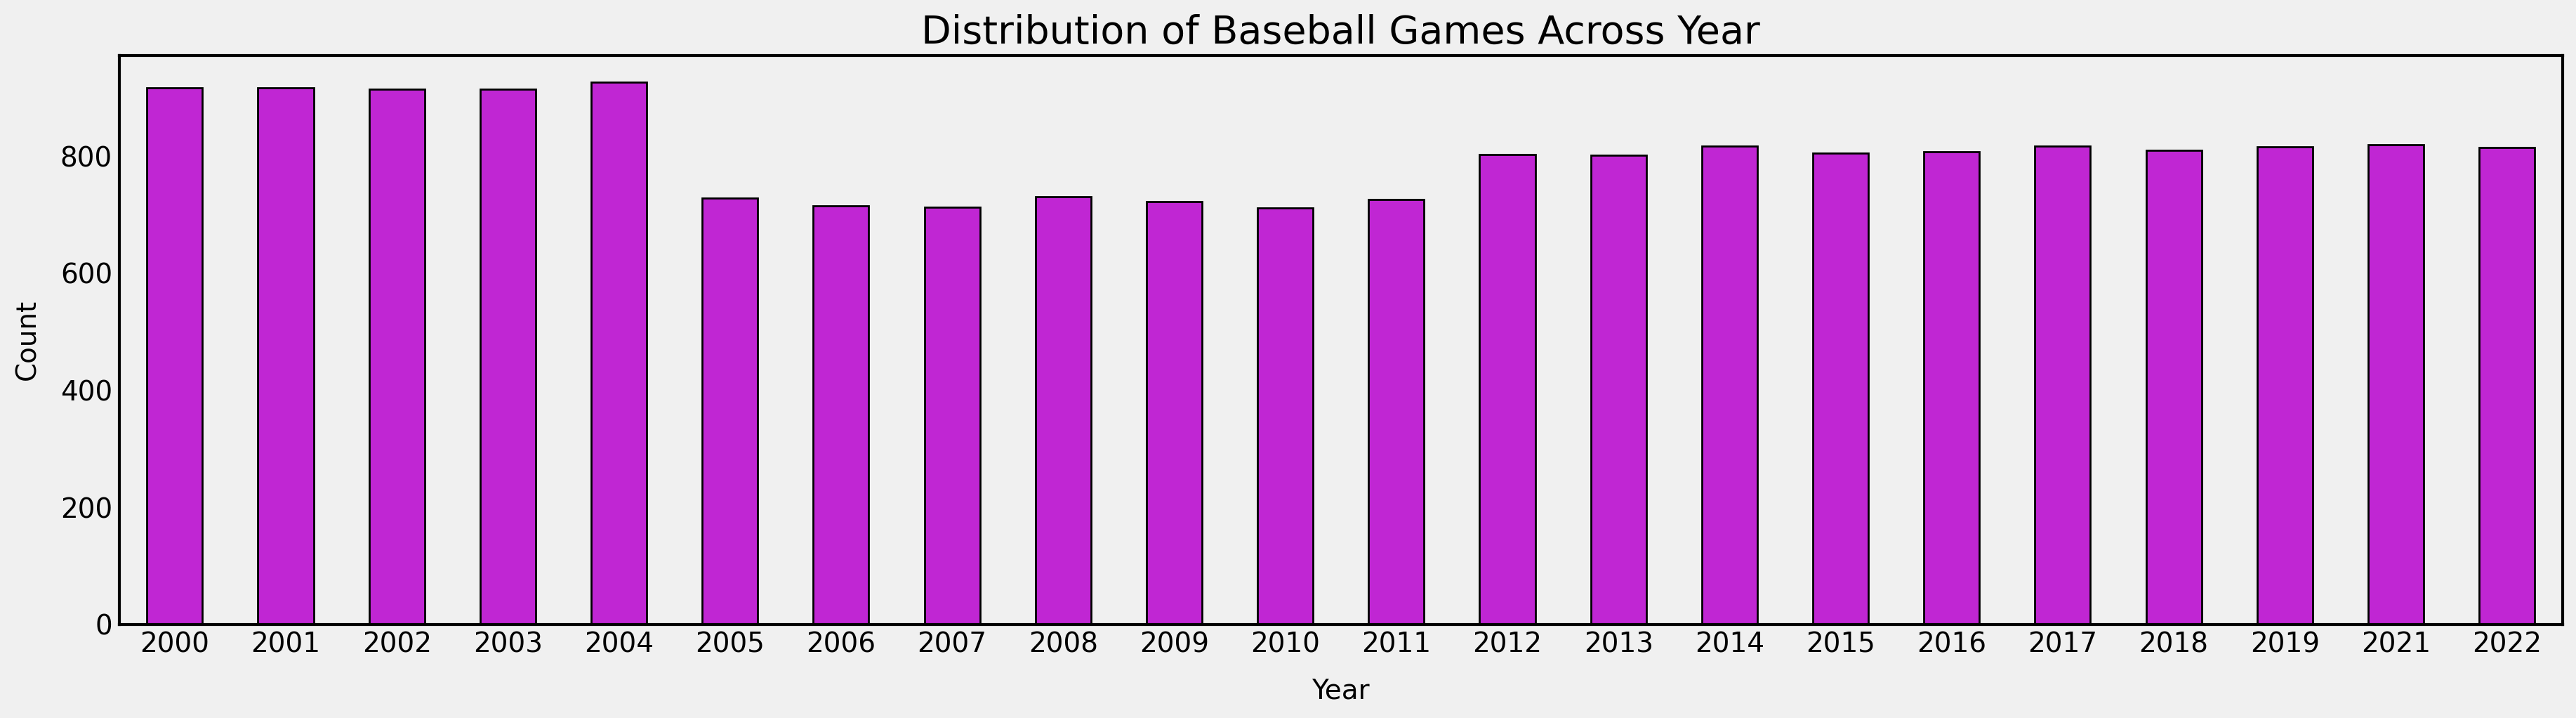

In [172]:
df['Year'] = df['Date'].apply(lambda d: d.year)
ax = df['Year'].value_counts().sort_index().plot(kind='bar', figsize=(20, 5),
                                                 color='#C026D3',
                                                 edgecolor='black', linewidth=1)
ax.set_title('Distribution of Baseball Games Across Year', size=20)
ax.set_xlabel('Year', labelpad=10, size=14)
ax.set_ylabel('Count', labelpad=10, size=14)
ax.grid(False)
ax.tick_params(axis='x', labelrotation=0)

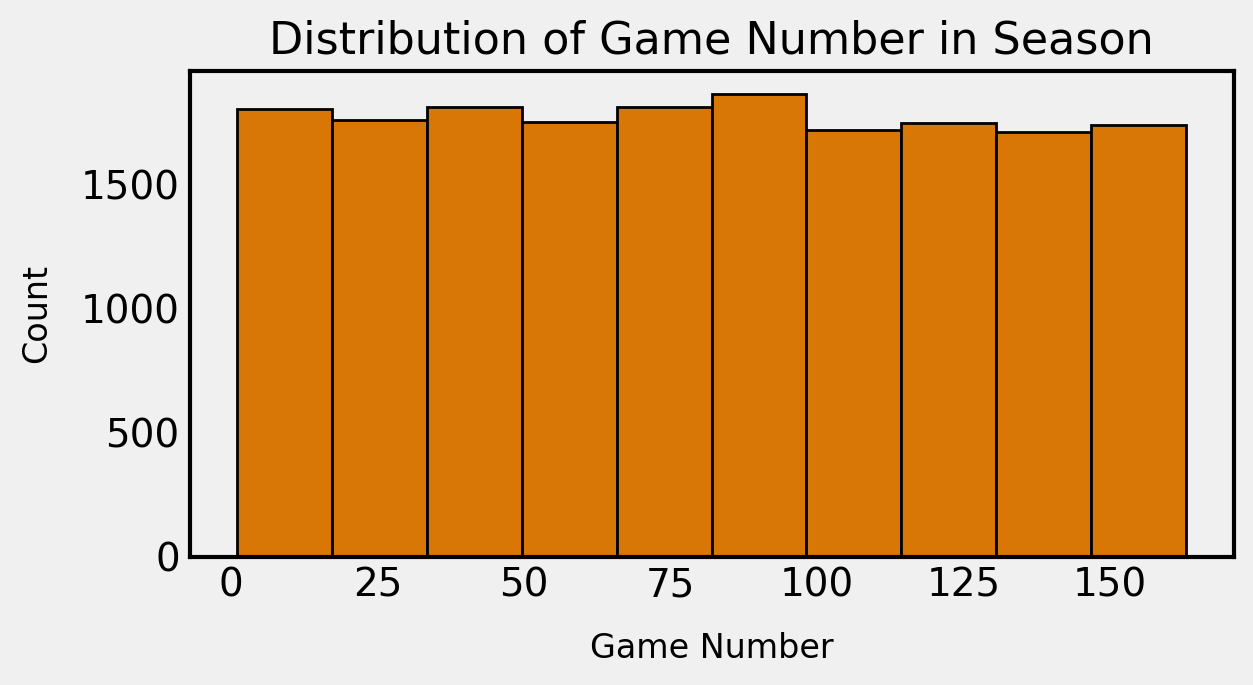

In [173]:
ax = df['Gm#'].plot(kind='hist', figsize=(6, 3),
                    color='#D97706', edgecolor='black',
                    linewidth=1)
ax.set_title('Distribution of Game Number in Season', size=16)
ax.set_xlabel('Game Number', labelpad=10, size=12)
ax.set_ylabel('Count', labelpad=10, size=12)
ax.tick_params(axis='x', labelrotation=0)
ax.grid(False)

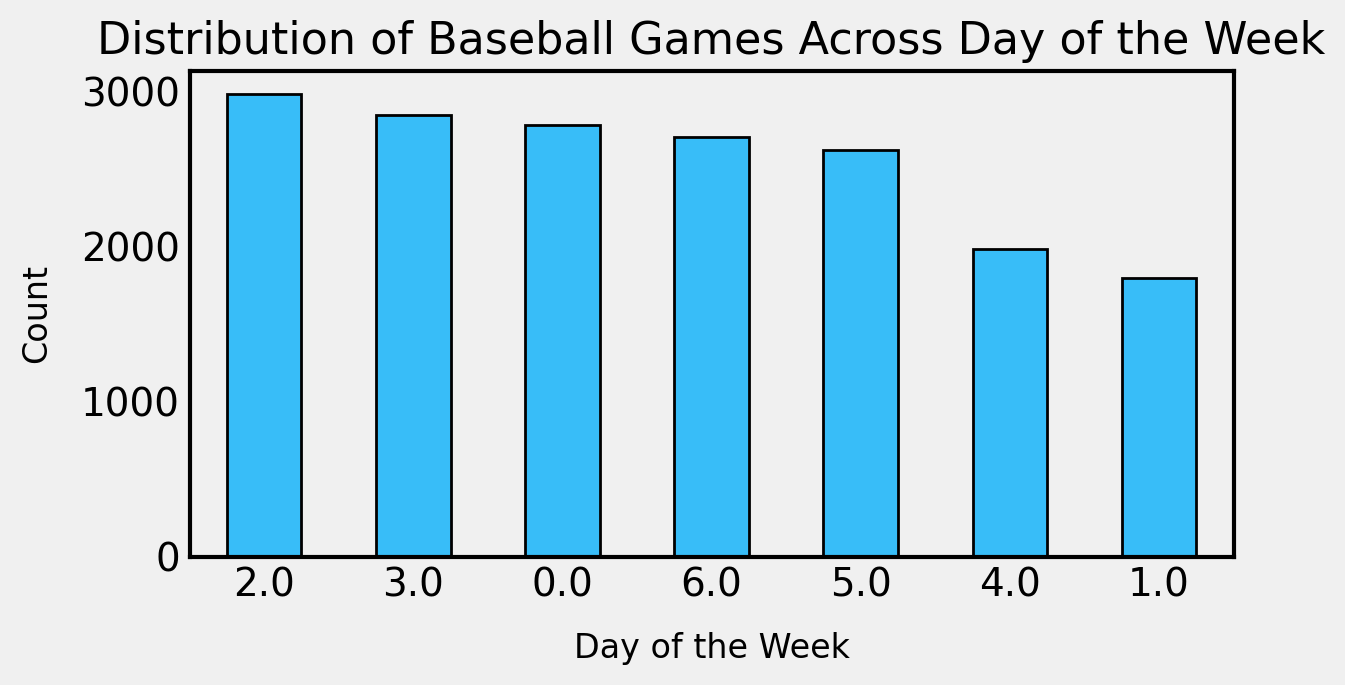

In [174]:
ax = df['DayofWeek'].value_counts().plot(kind='bar', figsize=(6, 3), color='#38BDF8',
                                         edgecolor='black', linewidth=1)
ax.set_title('Distribution of Baseball Games Across Day of the Week', size=16)
ax.set_xlabel('Day of the Week', labelpad=10, size=12)
ax.set_ylabel('Count', labelpad=10, size=12)
ax.grid(False)
ax.tick_params(axis='x', labelrotation=0)

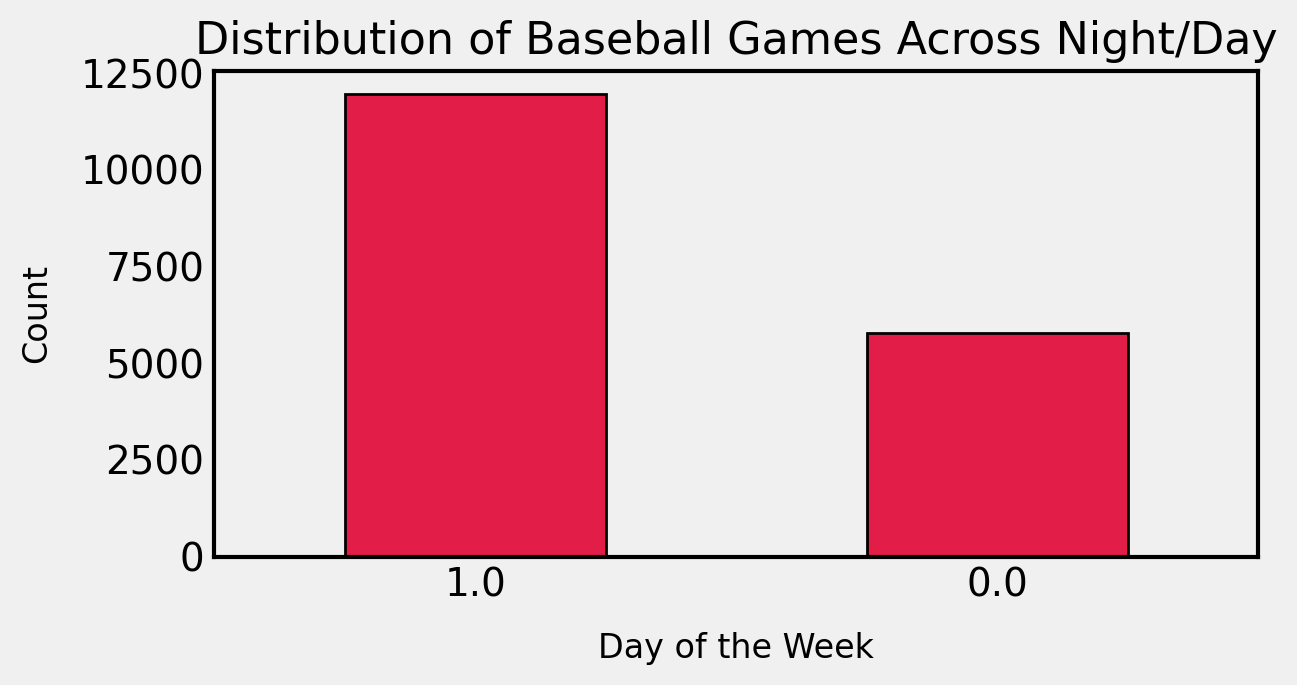

In [175]:
ax = df['DayNight'].value_counts().plot(kind='bar', figsize=(6, 3), color='#E11D48',
                                        edgecolor='black', linewidth=1)
ax.set_title('Distribution of Baseball Games Across Night/Day', size=16)
ax.set_xlabel('Day of the Week', labelpad=10, size=12)
ax.set_ylabel('Count', labelpad=10, size=12)
ax.tick_params(axis='x', labelrotation=0)
ax.grid(False)

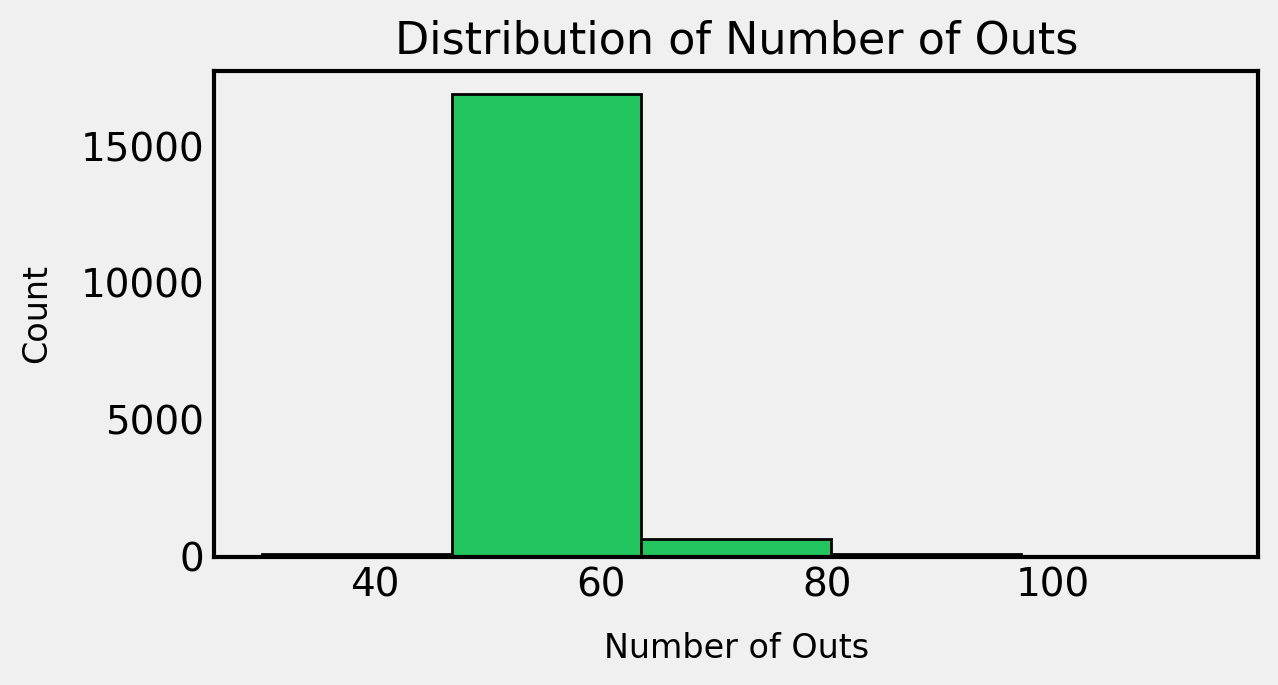

In [176]:
ax = df['NumberofOuts'].plot(kind='hist', figsize=(6, 3), color='#22C55E',
                             bins=5, edgecolor='black', linewidth=1)
ax.set_title('Distribution of Number of Outs', size=16)
ax.set_xlabel('Number of Outs', labelpad=10, size=12)
ax.set_ylabel('Count', labelpad=10, size=12)
ax.grid(False)

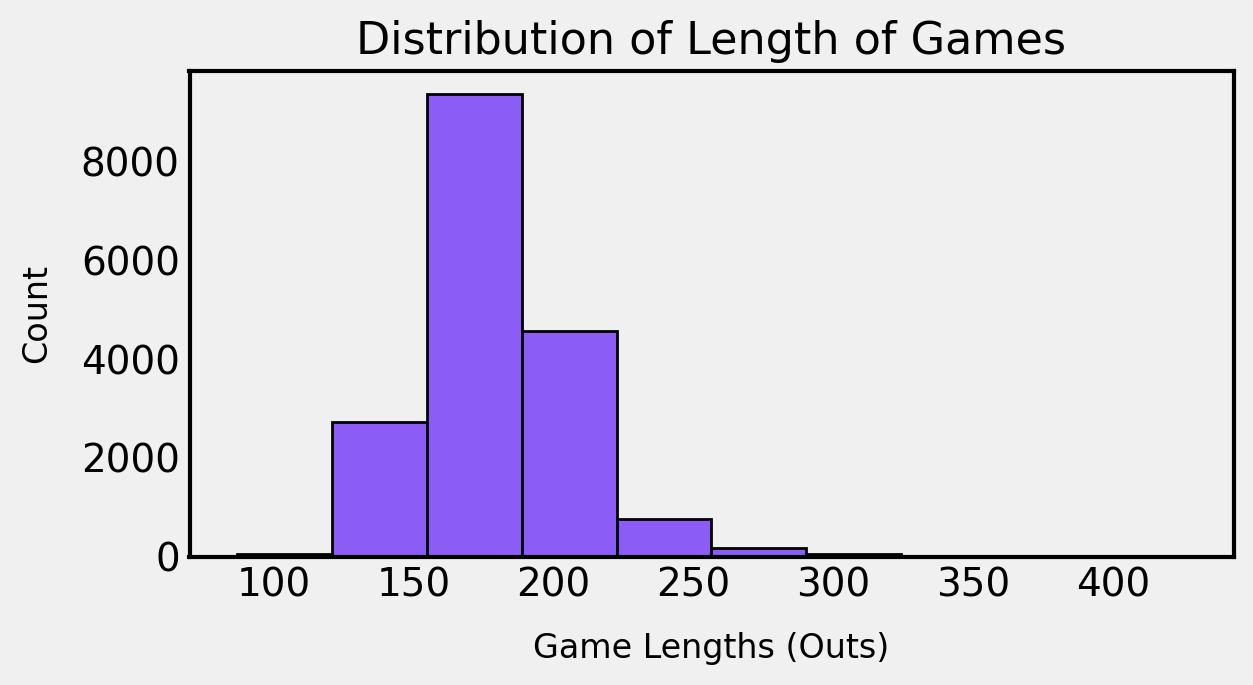

In [177]:
ax = df['LengthofGame'].plot(kind='hist', figsize=(6, 3), color='#8B5CF6', bins=10,
                             edgecolor='black', linewidth=1)
ax.set_title('Distribution of Length of Games', size=16)
ax.set_xlabel('Game Lengths (Outs)', labelpad=10, size=12)
ax.set_ylabel('Count', labelpad=10, size=12)
ax.grid(False)

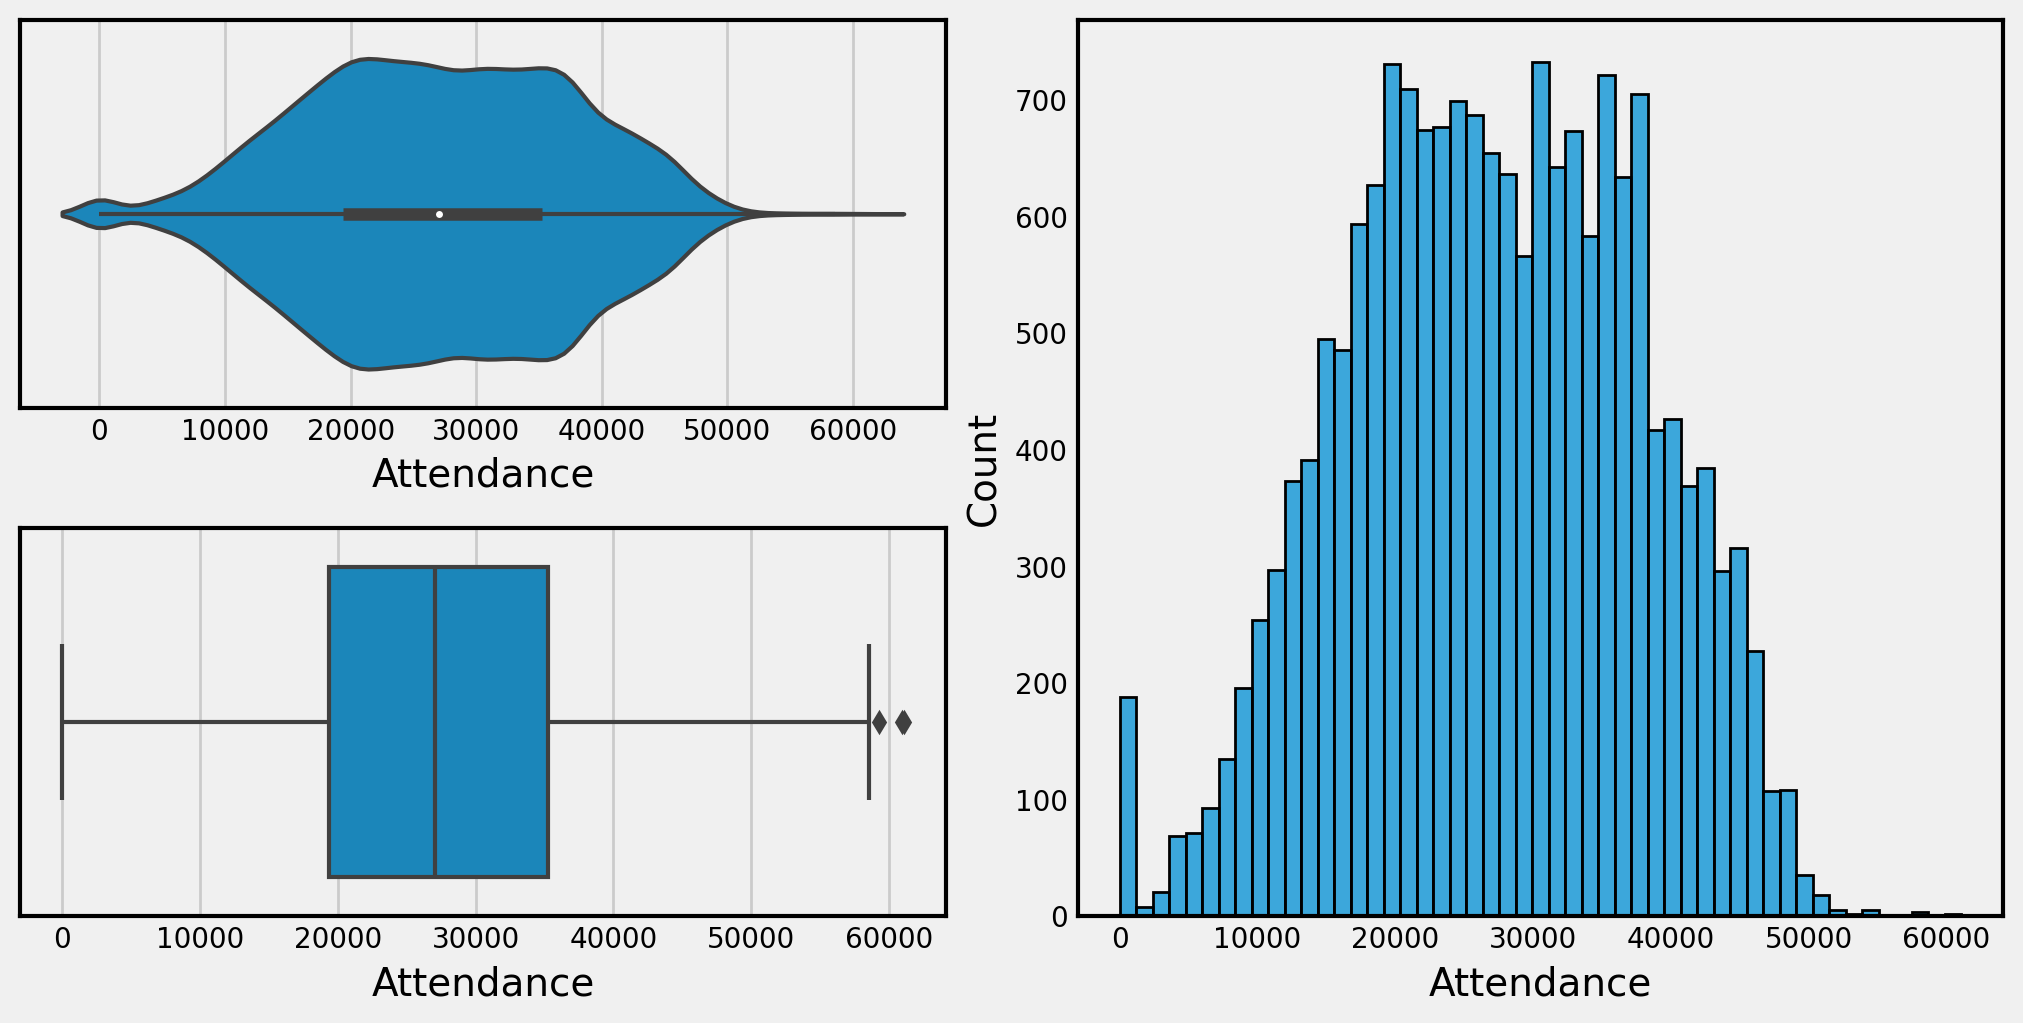

In [178]:
fig, axd = plt.subplot_mosaic([['upper left', 'right'],
                               ['lower left', 'right']],
                              figsize=(10, 5), layout="constrained")
a = sns.violinplot(data=df, x='Attendance', linewidth=1.5, ax=axd['upper left'])
a1 = sns.boxplot(data=df, x='Attendance', linewidth=1.5, ax=axd['lower left'])
a2 = sns.histplot(data=df, x='Attendance', ax=axd['right'], edgecolor='black', linewidth=1)
a2.grid(False)
for k in axd.keys():
    axd[k].tick_params(axis='both', which='major', labelsize=10)

# Feature Relationships

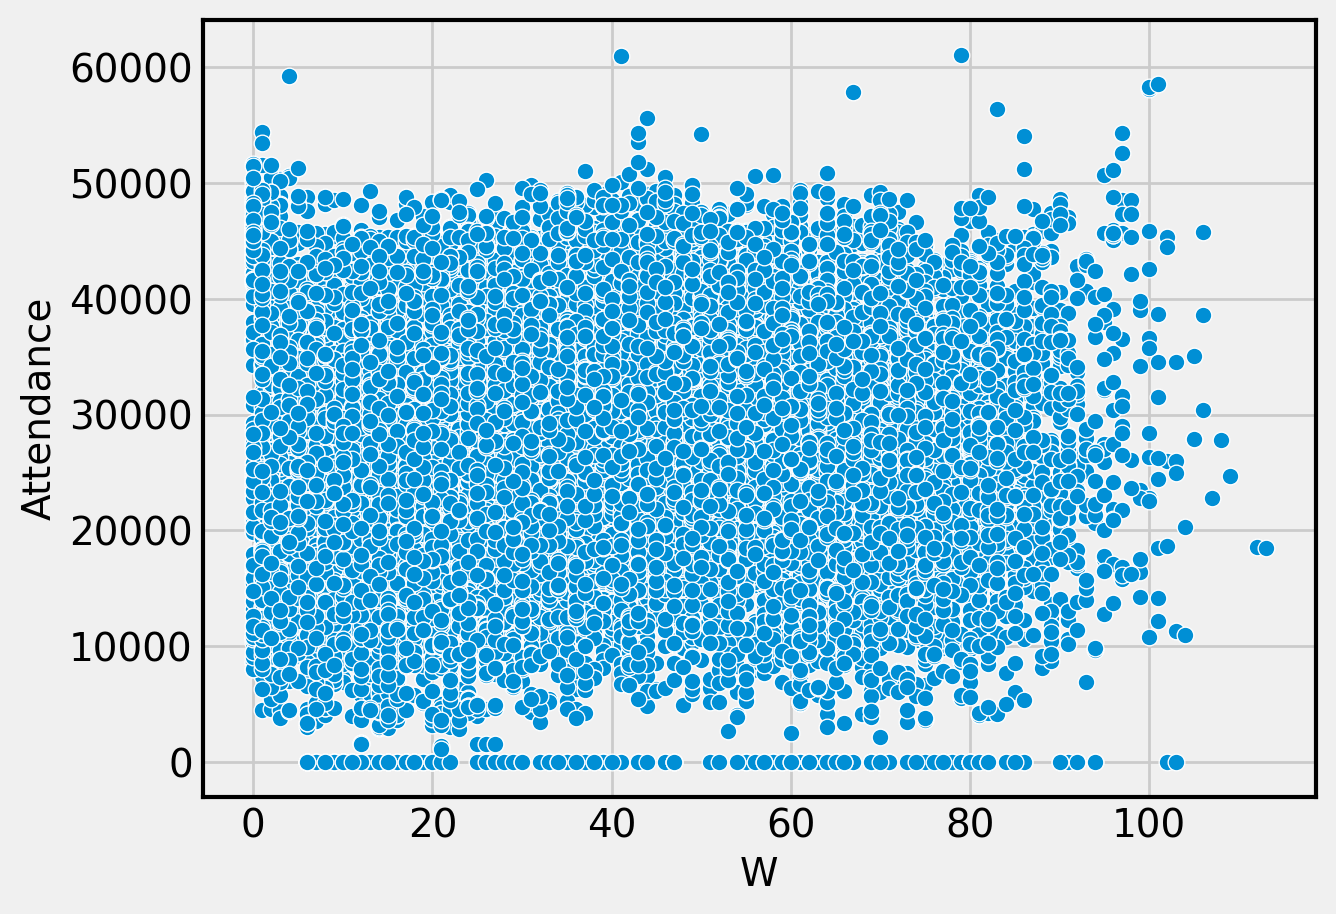

In [181]:
ax = sns.scatterplot(data=df, x='W', y='Attendance')

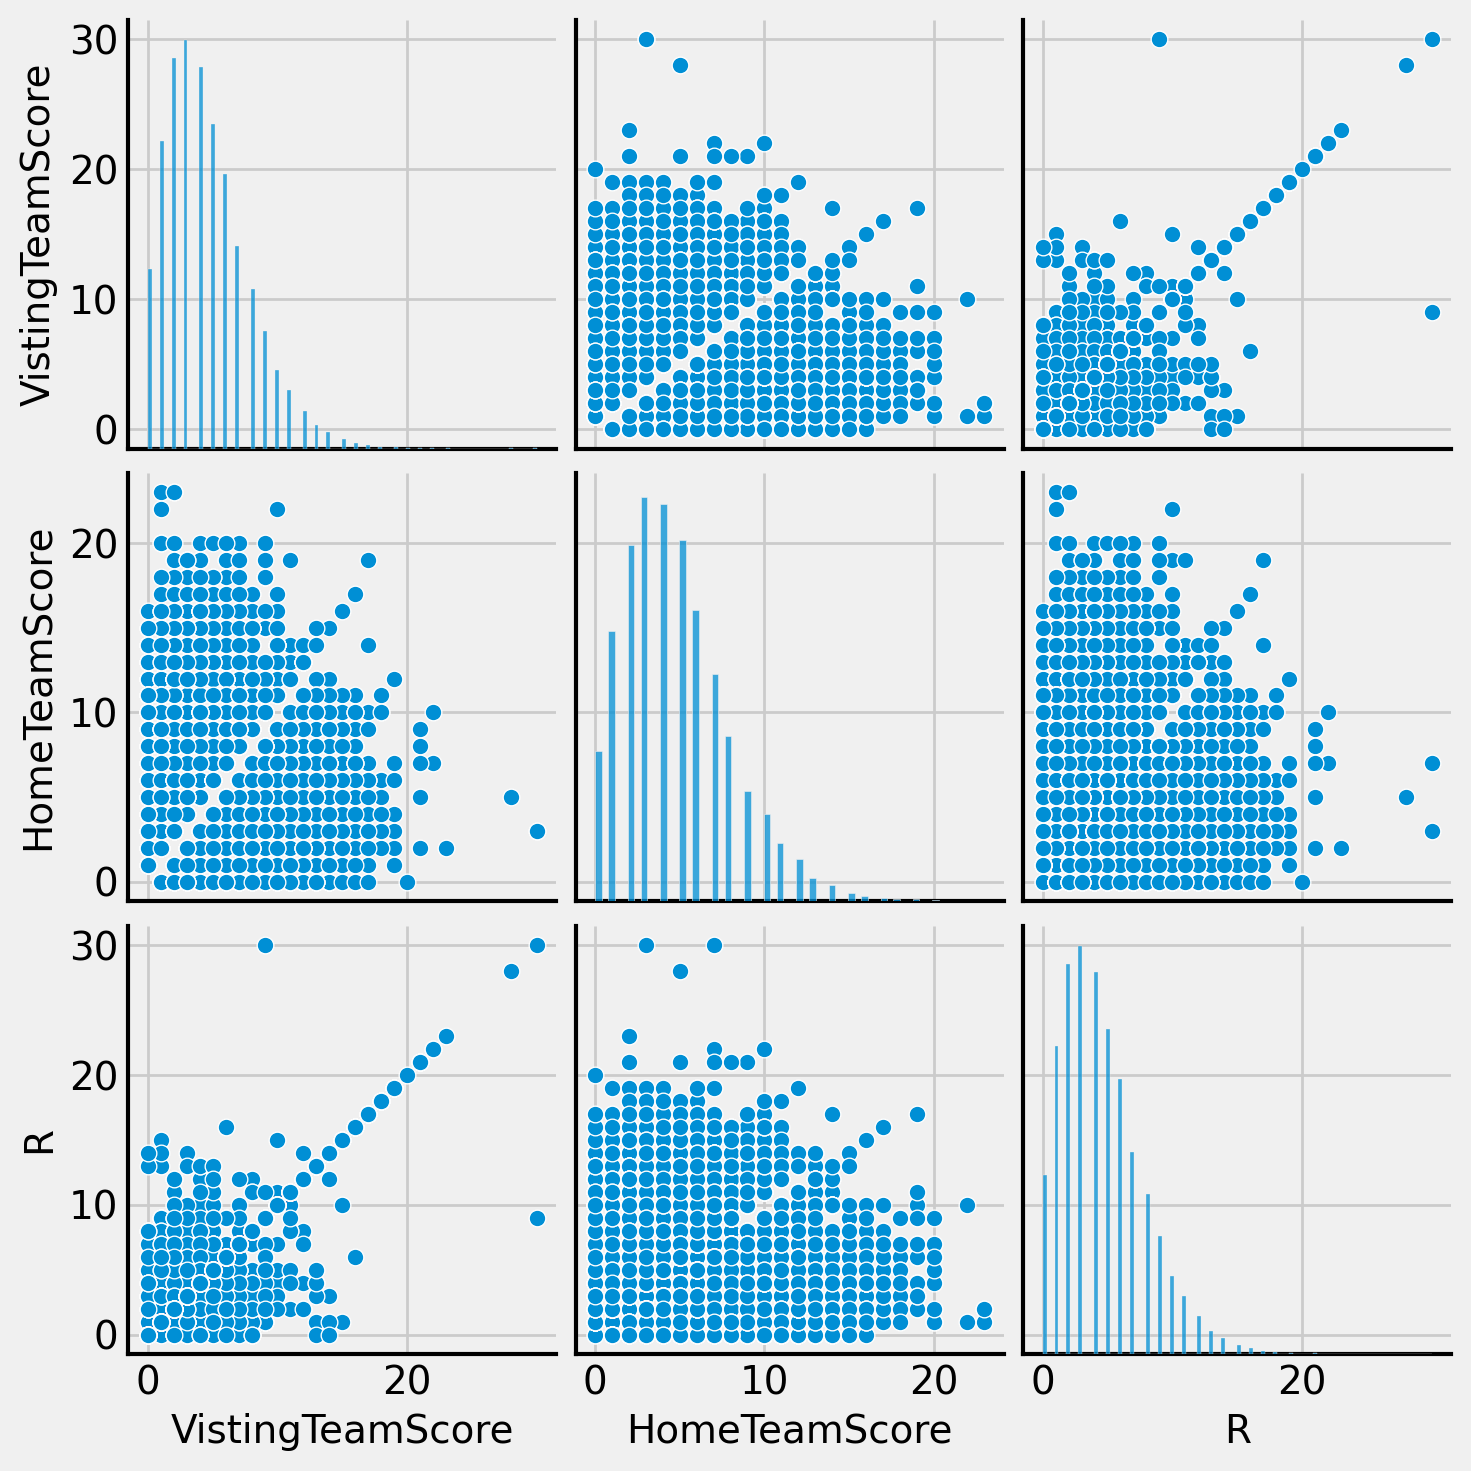

In [180]:
sns.pairplot(data=df,
             vars=['VistingTeamScore', 'HomeTeamScore', 'R'])

<Axes: >

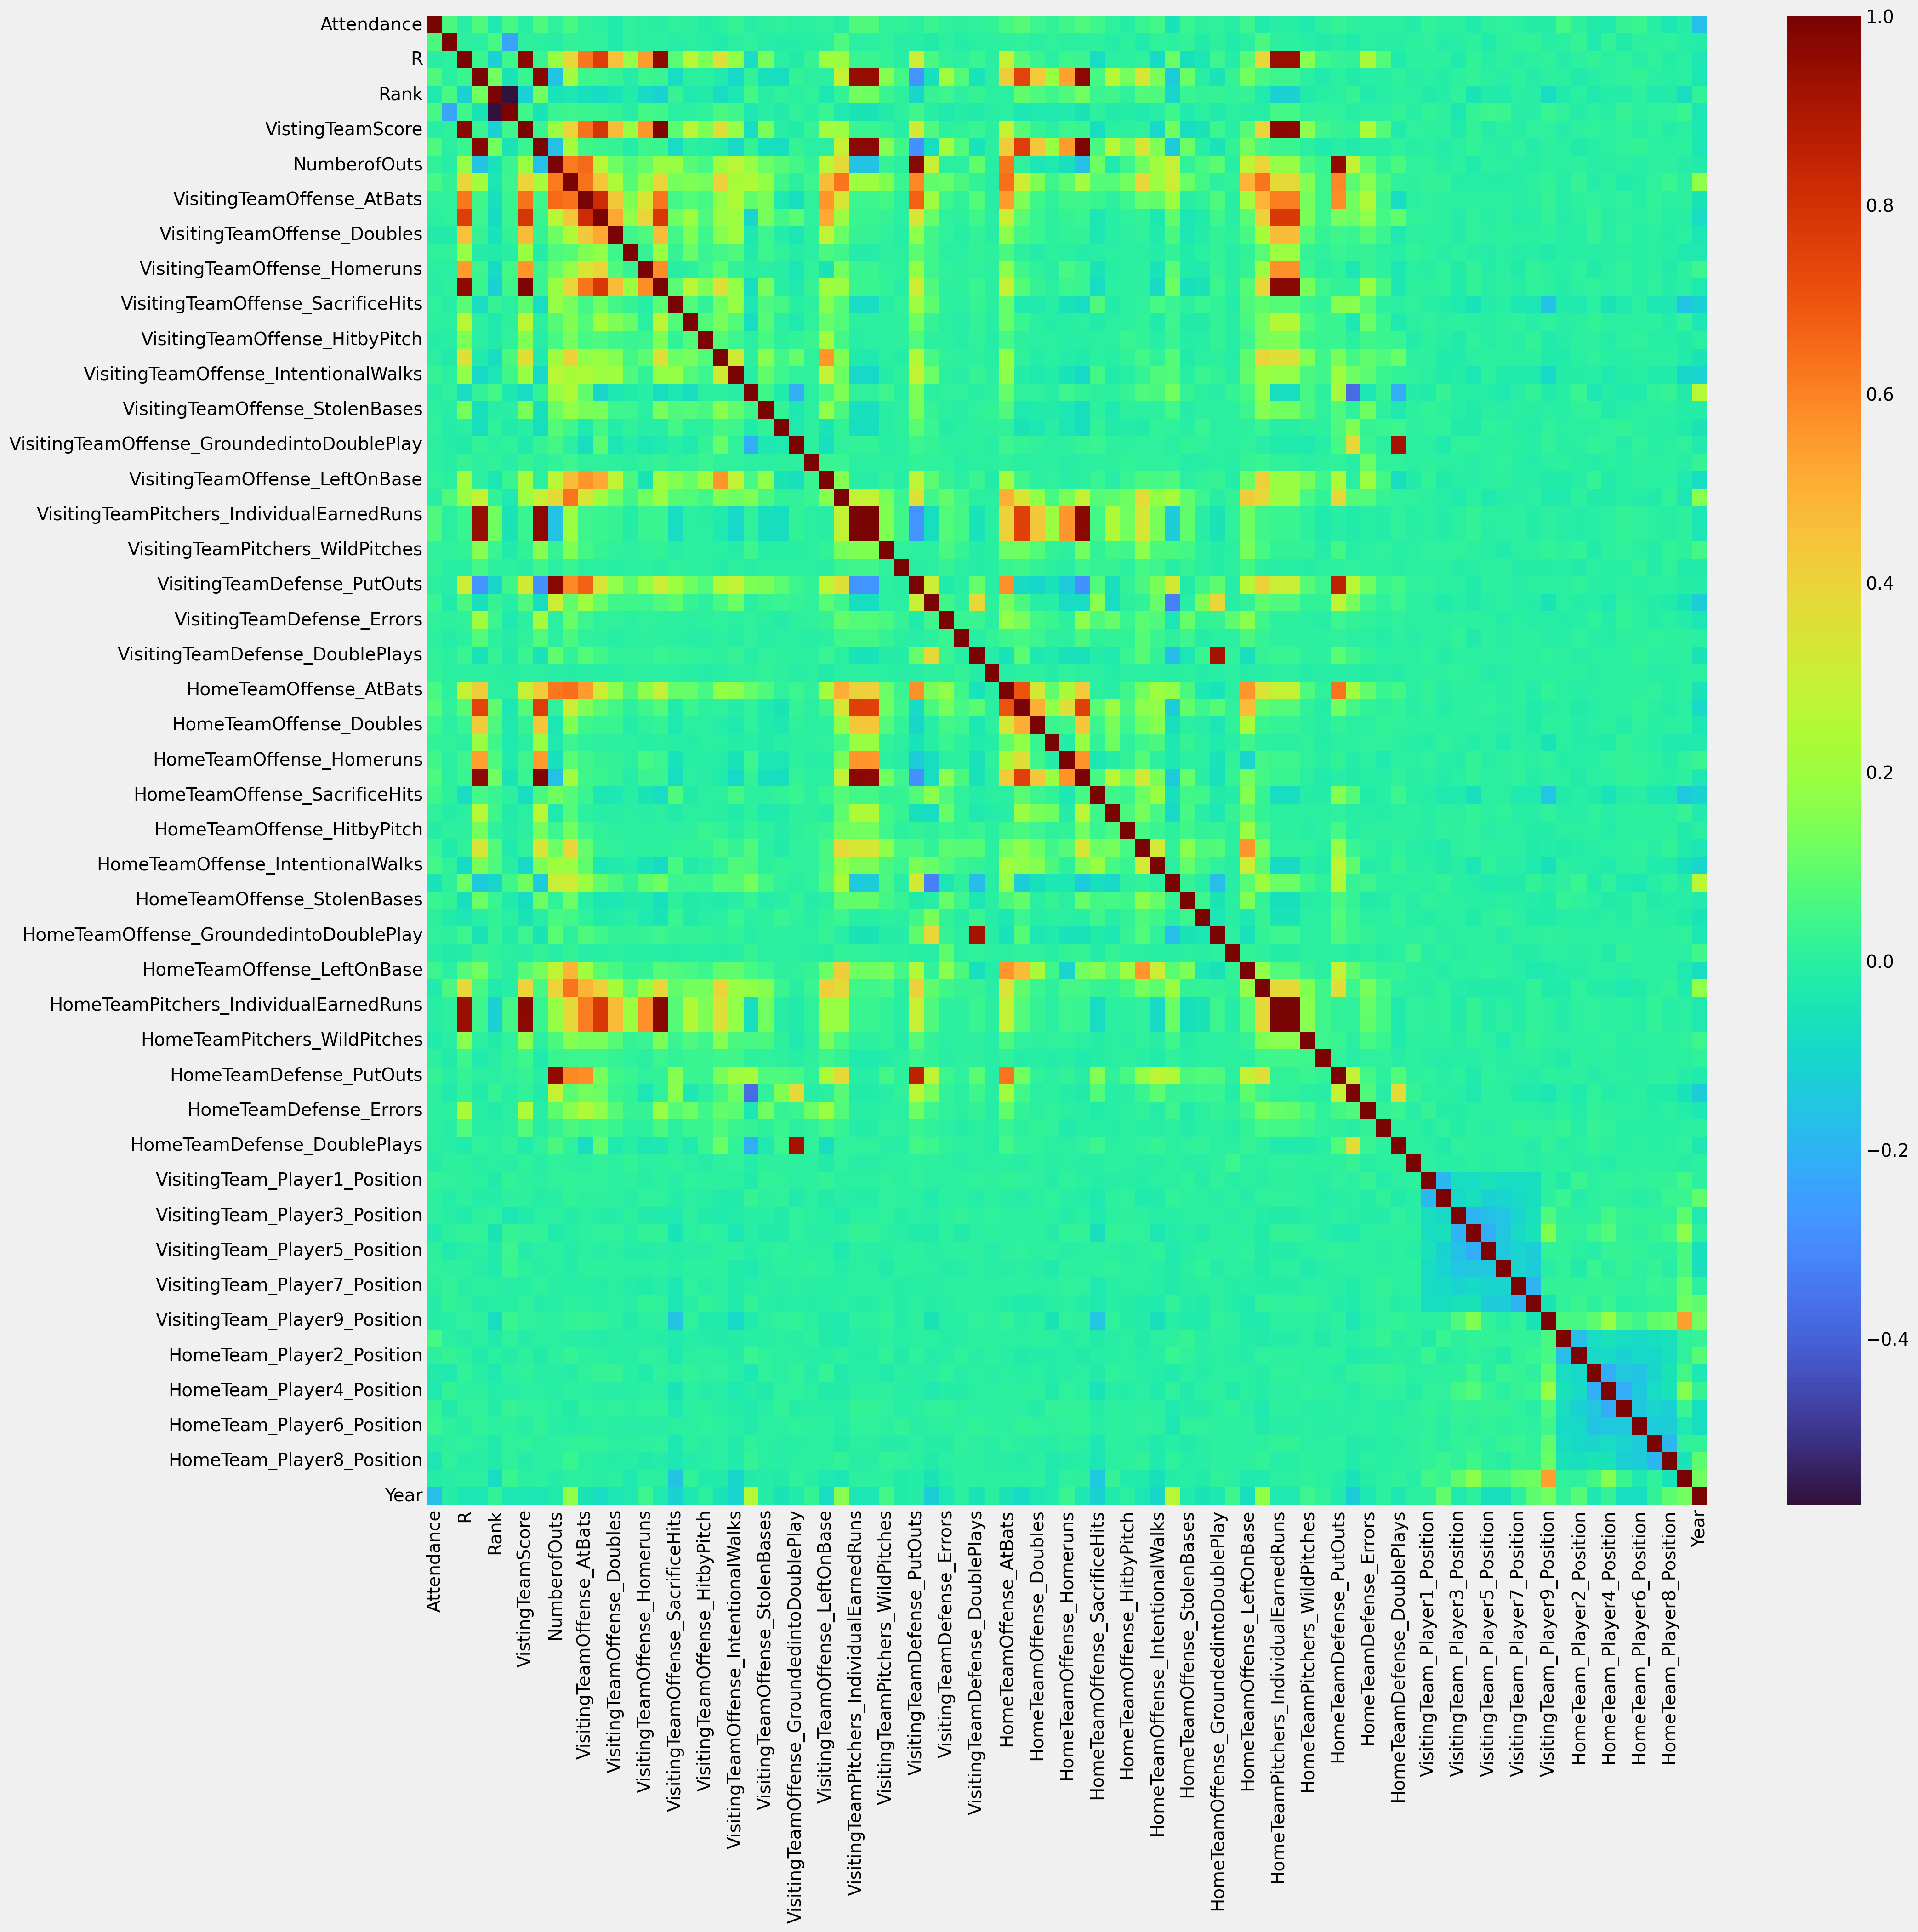

In [117]:
corr = df.select_dtypes(['int', 'float']).corr(method='pearson')
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
sns.heatmap(corr, cmap='turbo', ax=ax)

In [118]:
# filter by top 10 strongest correlations with attendance excluding attendance with itself
corr.loc[corr.index != 'Attendance', 'Attendance'].abs().sort_values(ascending=False)

Year                                          0.171209
HomeTeamOffense_Hits                          0.077130
RA                                            0.067644
VisitingTeamPitchers_IndividualEarnedRuns     0.066466
VisitingTeamPitchers_TeamEarnedRuns           0.066353
                                                ...   
HomeTeamDefense_DoublePlays                   0.002128
VisitingTeamOffense_Walks                     0.001071
VisitingTeam_Player7_Position                 0.000754
VisitingTeamOffense_GroundedintoDoublePlay    0.000342
VisitingTeamOffense_Homeruns                  0.000103
Name: Attendance, Length: 84, dtype: float64